In [15]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
from sklearn.datasets import load_boston
boston=load_boston()


In [25]:
dfx=pd.DataFrame(boston.data, columns=boston.feature_names)
dfy=pd.DataFrame(boston.target)



In [18]:
dfx.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [19]:
dfx

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [20]:
dfx.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [26]:
lreg=linear_model.LinearRegression()

In [51]:
x_train ,x_test, y_train, y_test=train_test_split(dfx, dfy, test_size=0.35,random_state=42)

In [52]:
lreg.fit(x_train,y_train)

LinearRegression()

In [53]:
type(lreg)

sklearn.linear_model._base.LinearRegression

In [54]:
y_pre=lreg.predict(x_test)
print(y_pre)

[[28.60952259]
 [36.85626762]
 [15.38876853]
 [25.64452724]
 [18.72406291]
 [23.02649513]
 [17.22868975]
 [14.03971784]
 [22.90670254]
 [20.69041947]
 [24.73520492]
 [17.96890471]
 [-6.49207567]
 [21.70616258]
 [19.16447129]
 [26.1151788 ]
 [20.0098639 ]
 [ 5.8259821 ]
 [40.35956964]
 [17.44880445]
 [27.74945705]
 [30.41791488]
 [10.81978361]
 [24.07657703]
 [18.05289889]
 [16.00449195]
 [23.29369825]
 [14.31869068]
 [22.28081994]
 [19.47481812]
 [22.2608951 ]
 [25.17207242]
 [25.15099492]
 [18.56351246]
 [16.54736404]
 [17.25387612]
 [30.61612043]
 [20.23499258]
 [24.01263759]
 [25.08156765]
 [14.14968964]
 [31.88091413]
 [42.5288082 ]
 [17.71599873]
 [27.10637661]
 [17.21118733]
 [13.74907678]
 [26.27942679]
 [20.22707024]
 [30.02474054]
 [20.8262701 ]
 [34.00026004]
 [15.45627088]
 [26.17520657]
 [39.17414311]
 [22.97772259]
 [18.82705058]
 [33.34969341]
 [24.84578337]
 [12.58167816]
 [22.31016961]
 [30.62312131]
 [31.8940865 ]
 [16.70066786]
 [20.68101451]
 [16.58194638]
 [20.25494

In [55]:
print(y_test)

        0
173  23.6
274  32.4
491  13.6
72   22.8
452  16.1
..    ...
157  41.3
472  23.2
118  20.4
114  18.5
175  29.4

[178 rows x 1 columns]


In [56]:
print(np.mean((y_pre-y_test)**2))

0    20.746063
dtype: float64


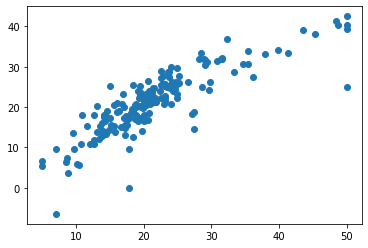

In [58]:
plt.scatter(y_test,y_pre)

C:\Users\nqu70\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


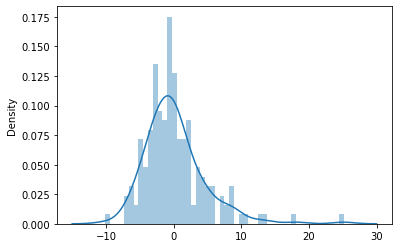

In [59]:
sns.distplot((y_test-y_pre),bins=50);